In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.config', 'sample_data']


In [ ]:
from google.colab import files
uploaded=files.upload()
dataset = pd.read_csv("heart.csv")

Saving heart.csv to heart.csv


In [ ]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
dataset = dataset[~dataset.isin(['?'])]
dataset = dataset.dropna(axis=0)
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
dataset.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

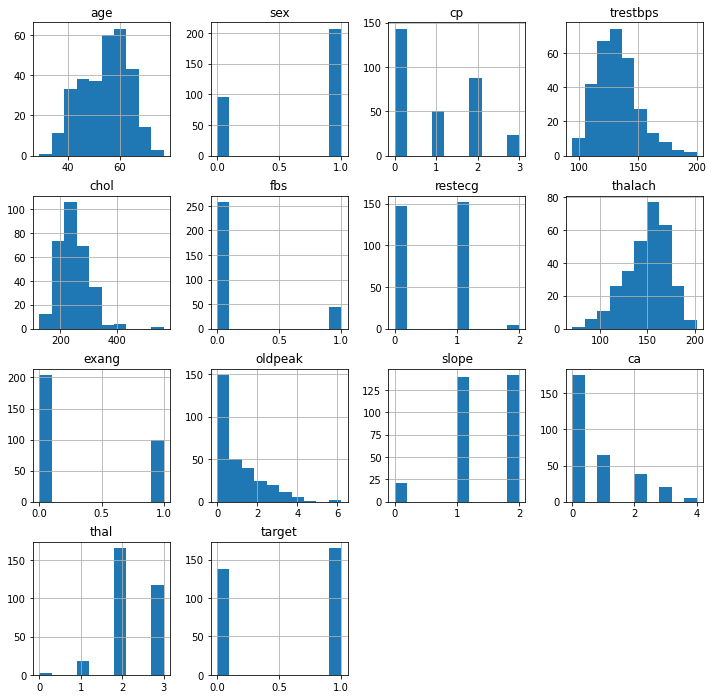

In [ ]:
dataset.hist(figsize = (12, 12))
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [ ]:
print(X_train)

     age  sex  cp  trestbps  chol  ...  exang  oldpeak  slope  ca  thal
74    43    0   2       122   213  ...      0      0.2      1   0     2
153   66    0   2       146   278  ...      0      0.0      1   1     2
64    58    1   2       140   211  ...      0      0.0      2   0     2
296   63    0   0       124   197  ...      1      0.0      1   0     2
287   57    1   1       154   232  ...      0      0.0      2   1     2
..   ...  ...  ..       ...   ...  ...    ...      ...    ...  ..   ...
251   43    1   0       132   247  ...      1      0.1      1   4     3
192   54    1   0       120   188  ...      0      1.4      1   1     3
117   56    1   3       120   193  ...      0      1.9      1   0     3
47    47    1   2       138   257  ...      0      0.0      2   0     2
172   58    1   1       120   284  ...      0      1.8      1   0     2

[242 rows x 13 columns]


In [ ]:
print(X_test)

     age  sex  cp  trestbps  chol  ...  exang  oldpeak  slope  ca  thal
225   70    1   0       145   174  ...      1      2.6      0   0     3
152   64    1   3       170   227  ...      0      0.6      1   0     3
228   59    1   3       170   288  ...      0      0.2      1   0     3
201   60    1   0       125   258  ...      1      2.8      1   1     3
52    62    1   2       130   231  ...      0      1.8      1   3     3
..   ...  ...  ..       ...   ...  ...    ...      ...    ...  ..   ...
146   44    0   2       118   242  ...      0      0.3      1   1     2
302   57    0   1       130   236  ...      0      0.0      1   1     2
26    59    1   2       150   212  ...      0      1.6      2   0     2
108   50    0   1       120   244  ...      0      1.1      2   0     2
89    58    0   0       100   248  ...      0      1.0      1   0     2

[61 rows x 13 columns]


In [ ]:
print('Training samples : ',X_train.shape[0])
print('Testing samples : ',X_test.shape[0])
print('Total samples : ',dataset.shape[0])

Training samples :  242
Testing samples :  61
Total samples :  303


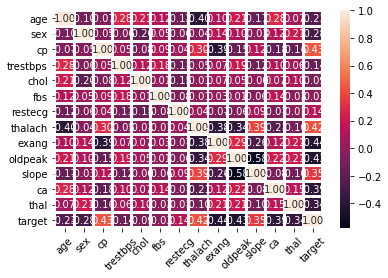

In [ ]:
heat_map = sns.heatmap(dataset.corr(method='pearson'), annot=True, fmt='.2f', linewidths=2)
heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation=45);
plt.rcParams["figure.figsize"] = (10,10)

In [ ]:
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history=model.fit(X_train,Y_train,epochs=500)

Epoch 1/500
8/8 [==============================] - 14s 2ms/step - loss: 6.3308 - accuracy: 0.5090
Epoch 2/500
8/8 [==============================] - 0s 2ms/step - loss: 3.8312 - accuracy: 0.4906
Epoch 3/500
8/8 [==============================] - 0s 2ms/step - loss: 3.6095 - accuracy: 0.4163
Epoch 4/500
8/8 [==============================] - 0s 2ms/step - loss: 3.5582 - accuracy: 0.3790
Epoch 5/500
8/8 [==============================] - 0s 2ms/step - loss: 3.2828 - accuracy: 0.4252
Epoch 6/500
8/8 [==============================] - 0s 2ms/step - loss: 2.8072 - accuracy: 0.4508
Epoch 7/500
8/8 [==============================] - 0s 2ms/step - loss: 2.6486 - accuracy: 0.4096
Epoch 8/500
8/8 [==============================] - 0s 3ms/step - loss: 2.1534 - accuracy: 0.4510
Epoch 9/500
8/8 [==============================] - 0s 2ms/step - loss: 2.2050 - accuracy: 0.4285
Epoch 10/500
8/8 [==============================] - 0s 3ms/step - loss: 2.0280 - accuracy: 0.4832
Epoch 11/500
8/8 [==========

dict_keys(['loss', 'accuracy'])


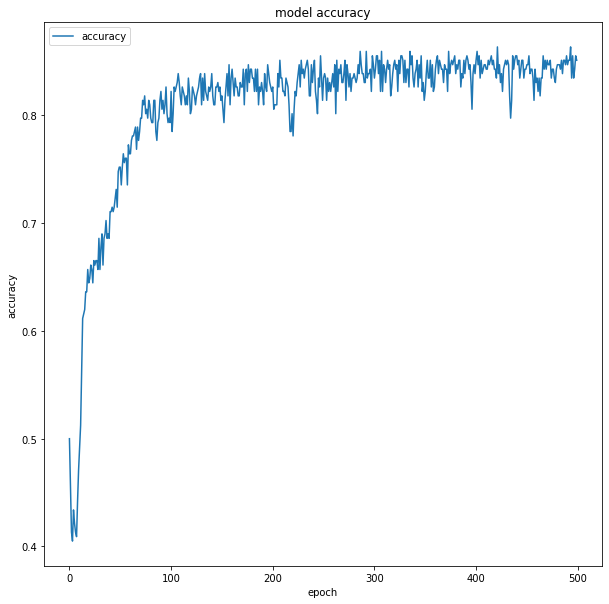

In [ ]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'], loc='upper left')
plt.show()

In [ ]:
Y_pred_nn = model.predict(X_test)

In [ ]:
print(Y_pred_nn)

[0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1]


In [ ]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

#Note: Accuracy of 85% can be achieved on the test set, by setting epochs=2000, and number of nodes = 11. 

The accuracy score achieved using Neural Network is: 81.97 %


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred_nn))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79        27
           1       0.83      0.85      0.84        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [ ]:
from sklearn import metrics
print(metrics.confusion_matrix(Y_test,Y_pred_nn))

[[21  6]
 [ 5 29]]


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
ns_probs = [0 for _ in range(len(Y_test))]
lr_probs = model.predict_proba(X_test)
#lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(Y_test, ns_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('ANN: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
ANN: ROC AUC=0.862


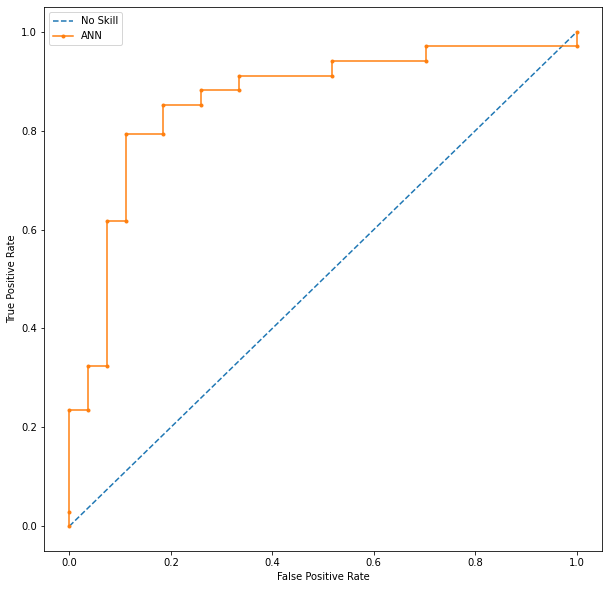

In [ ]:
from matplotlib import pyplot

ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='ANN')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()